In [1]:
#@title Librerías

import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
N = 100
r = 0.5*(2*np.random.random(N)- 1) # valores entre -1 y 1
b = 2
x = np.linspace(0, 10, N)
y = 2.1 * x + b + r

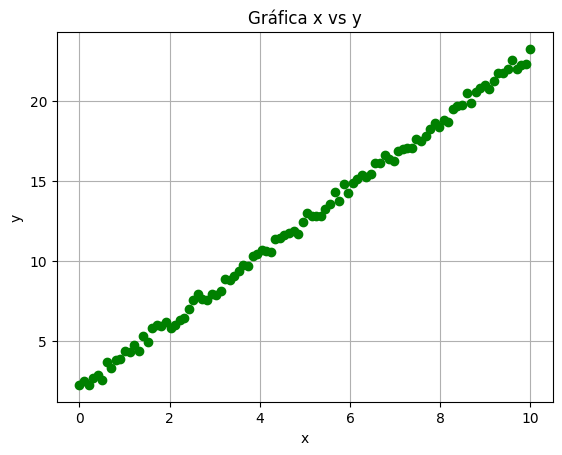

In [3]:
plt.plot(x, y, "go")
plt.title("Gráfica x vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

In [4]:
# Arreglo lineal ---> curve fit (mínimos cuadrados)

def fun(x, a, b):
  return a*x+b

fit = curve_fit(fun, x, y)

In [5]:
fit[0] # valores de interés (la otra matriz es de errores)

array([2.08904975, 2.02112429])

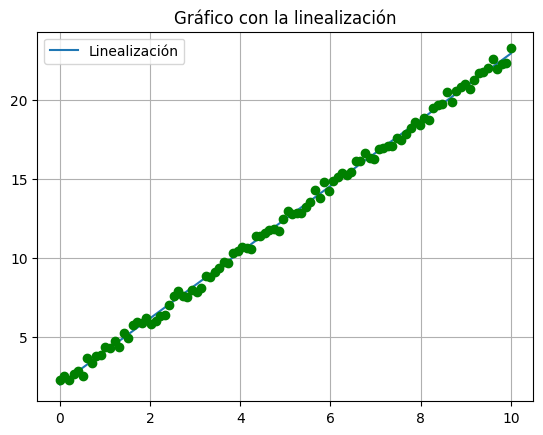

In [6]:
x_fit = np.linspace(min(x), max(x), 100)
y_fit = fun(x_fit, *fit[0])
plt.plot(x_fit, y_fit, "", label = "Linealización")
plt.plot(x, y, "go")
plt.title("Gráfico con la linealización")
plt.legend()
plt.grid()

In [7]:
# Cargar documentos del péndulo

URL = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT1on46nfXC-sPxOXOPO-OXCDIFOdmJWhn_WLEMFDX8REAmfrkT3XwFNuaYxk4gz2FE1KEJo2oHrUyG/pub?output=csv"
df = pd.read_csv(URL, sep = ";", decimal = ".")
df = df.rename(columns = {"Tiempo (ms)":"Tiempo [ms]", "Ángulo 1,":"AnguloDeg"})
df.AnguloDeg = df.AnguloDeg.str.replace(",", ".").astype(float)
df["AnguloRad"] = np.deg2rad(df.AnguloDeg)
df["Tiempo [s]"] = df["Tiempo [ms]"]/1000

In [8]:
df

,Tiempo [ms],AnguloDeg,AnguloRad,Tiempo [s]
0,9,59.289612,1.034799,0.009
1,42,59.982327,1.046889,0.042
2,75,61.237453,1.068795,0.075
3,108,63.492477,1.108153,0.108
4,142,65.388771,1.141249,0.142
...,...,...,...,...
2842,94709,94.937576,1.656973,94.709
2843,94743,96.479851,1.683891,94.743
2844,94776,97.940689,1.709387,94.776
2845,94809,99.318092,1.733428,94.809


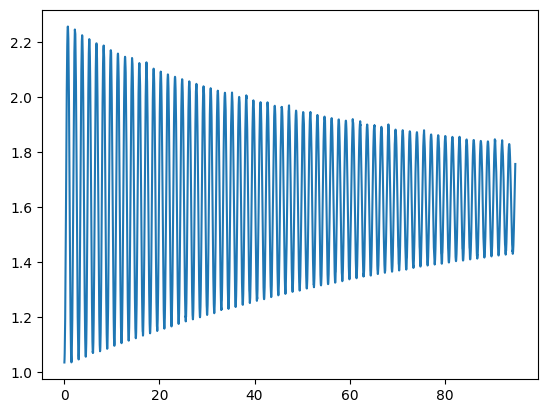

In [9]:
t_ = df["Tiempo [s]"]
y_ = df["AnguloRad"]
plt.plot(t_, y_)

In [10]:
def fun1(t, w, phi, alpha, a, cte):
  return a * (np.exp(-alpha*t) * np.sin(w*t + phi)) + cte

In [11]:
t = np.linspace(0, 10, 1000)
a = 2
w = 1
phi = 2
rand = (20*np.random.random(1000)) 
x_ = np.linspace(min(t), max(t), 100)

In [12]:
fit_ = curve_fit(fun1, t_, y_)

In [15]:
fit_

(array([ 4.19498078, -1.73654568,  0.01261671,  0.61320963,  1.63193063]),
 array([[ 1.04358911e-08, -3.14603724e-07, -6.76368361e-11,
         -1.73185026e-09,  3.66820861e-10],
        [-3.14603724e-07,  1.54949018e-05,  2.83738528e-09,
          7.90213336e-08, -2.11265085e-08],
        [-6.76368361e-11,  2.83738528e-09,  1.04226456e-08,
          1.92003530e-07, -1.99734498e-10],
        [-1.73185026e-09,  7.90213336e-08,  1.92003530e-07,
          5.79222787e-06, -9.68368996e-10],
        [ 3.66820861e-10, -2.11265085e-08, -1.99734498e-10,
         -9.68368996e-10,  4.28632137e-07]]))

In [19]:
f = fit_[0]
f

array([ 4.19498078, -1.73654568,  0.01261671,  0.61320963,  1.63193063])

In [27]:
x1 = np.linspace(min(t_), max(t_), 1000)
val = fun1(x1, *f)

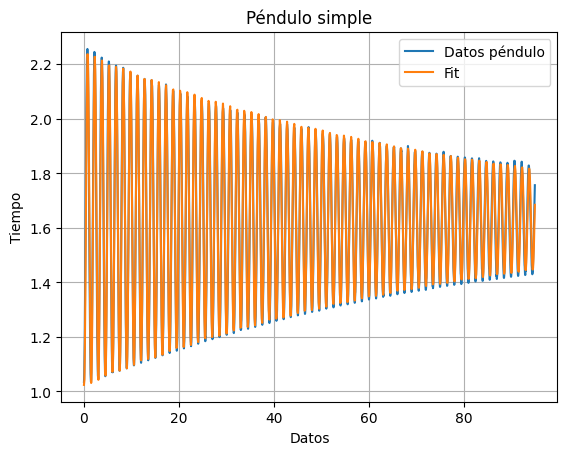

In [36]:
plt.plot(t_, y_, label = "Datos péndulo")
plt.plot(x1, val, label = "Fit")
plt.title("Péndulo simple")
plt.xlabel("Datos")
plt.ylabel("Tiempo")
plt.legend()
plt.grid()